**FIFA WORLD CUP ANALYSIS**

In [149]:
pip install cufflinks

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf

# Data Cleaning:
Preprocessed raw FIFA World Cup data for consistency and accuracy.

# Exploratory Data Analysis (EDA):
Identified key trends and patterns in tournament data.
Visualized historical performance using Python libraries such as Matplotlib and Seaborn.

#Insights Generation:
Highlighted standout teams, players and tournaments.

In [151]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

matches = pd.read_csv("WorldCupMatches.csv")
players = pd.read_csv("WorldCupPlayers.csv")
world_cup = pd.read_csv("WorldCups.csv")

Saving WorldCupMatches.csv to WorldCupMatches (2).csv
Saving WorldCupPlayers.csv to WorldCupPlayers (2).csv
Saving WorldCups.csv to WorldCups (2).csv


In [152]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [153]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [155]:
players.tail()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN
37783,255959,300186501,ARG,SABELLA Alejandro (ARG),N,23,BASANTA,NaN,NaN


In [156]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [157]:
world_cup.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [158]:
matches.dropna(subset=['Year'], inplace=True)

In [159]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [160]:
matches['Home Team Name'].value_counts()

,count
Home Team Name,
Brazil,82
Italy,57
Argentina,54
Germany FR,43
England,35
...,...
Wales,1
Norway,1
"rn"">United Arab Emirates",1


In [161]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

,count
Home Team Name,
"rn"">Republic of Ireland",5
"rn"">United Arab Emirates",1
"rn"">Trinidad and Tobago",1
"rn"">Serbia and Montenegro",1
"rn"">Bosnia and Herzegovina",1


In [162]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [163]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [164]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

In [165]:
wrong = wrong + old_name
correct = correct + new_name

wrong, correct

(['rn">Republic of Ireland',
  'rn">United Arab Emirates',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'United Arab Emirates',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracan Stadium',
  'Maracan Stadium'])

In [166]:
for index, wr in enumerate(wrong):
    world_cup = world_cup.replace(wrong[index], correct[index])

for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])

for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [167]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

,count
Home Team Name,


## Attendance, Number of Teams, Goals, and Matches per Cup


In [168]:

world_cup['Attendance'] = world_cup['Attendance'].str.replace(".", "")

In [169]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


<ipython-input-170-f5f0e8585d45>:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-170-f5f0e8585d45>:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-170-f5f0e8585d45>:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-170-f5f0e8585d45>:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0.5, 1.0, 'Team-Wise Match Participation and Scores Across Different Years')

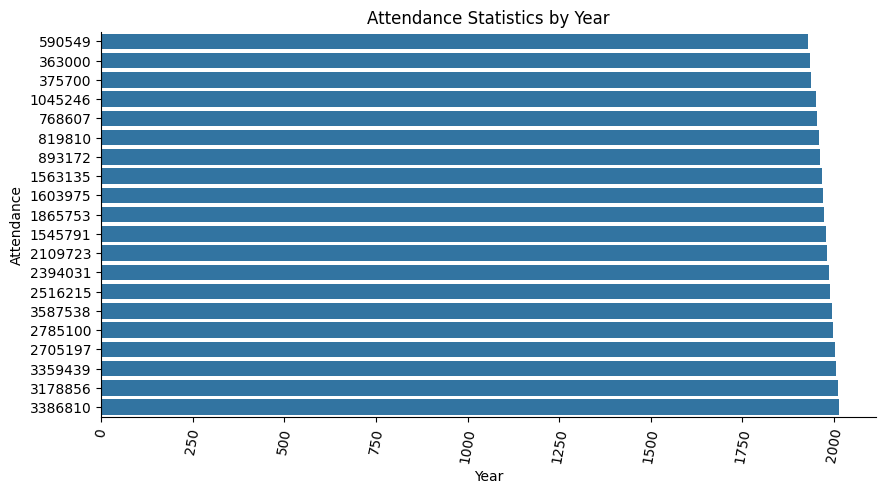

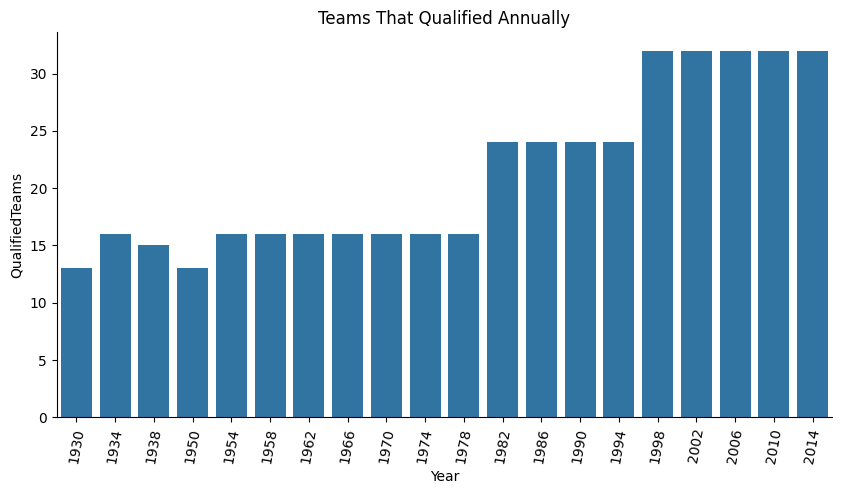

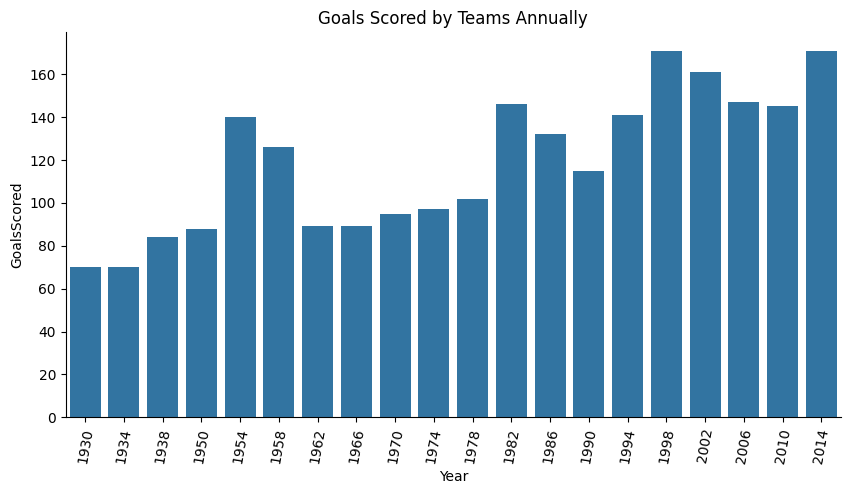

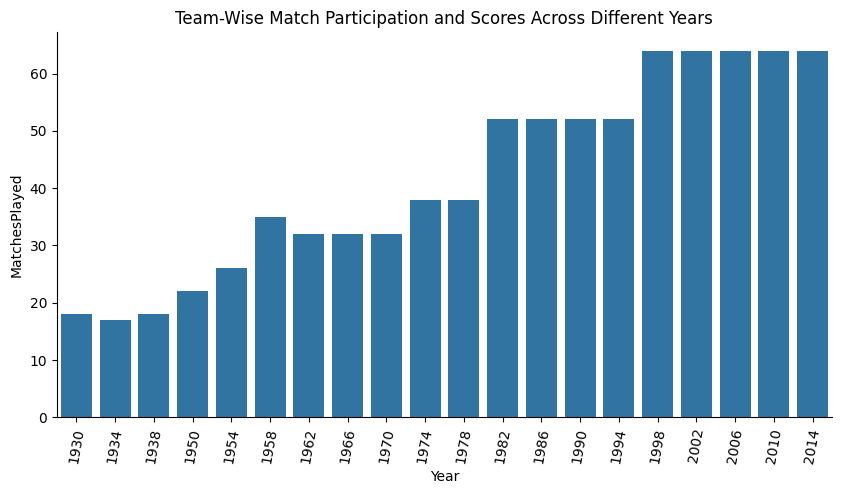

In [170]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance Statistics by Year')


fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Teams That Qualified Annually')


fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams Annually')


fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Team-Wise Match Participation and Scores Across Different Years')

# Games with the highest number of spectators (1930 - 2014)

In [171]:

matches['Datetime'] = pd.to_datetime(matches['Datetime'], errors='coerce')
invalid_dates = matches[matches['Datetime'].isna()]
print(invalid_dates)


       Year Datetime        Stage                    Stadium          City  \
229  1970.0      NaT  Semi-finals             Estadio Azteca  Mexico City    
251  1974.0      NaT      Group 1           Volksparkstadion      Hamburg    
269  1974.0      NaT        Final             Olympiastadion       Munich    
588  2002.0      NaT      Group C     Munsu Football Stadium        Ulsan    
591  2002.0      NaT      Group C  Gwangju World Cup Stadium      Gwangju    
592  2002.0      NaT      Group H       Saitama Stadium 2002      Saitama    
602  2002.0      NaT      Group B   Jeonju World Cup Stadium       Jeonju    
605  2002.0      NaT      Group G            Kashima Stadium      Ibaraki    
613  2002.0      NaT      Group A    Suwon World Cup Stadium        Suwon    
633  2002.0      NaT  Round of 16   Jeonju World Cup Stadium       Jeonju    

    Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
229          Italy              4.0              3.0        Germany   

In [172]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'], errors='coerce')
matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %y') if pd.notnull(x) else None)



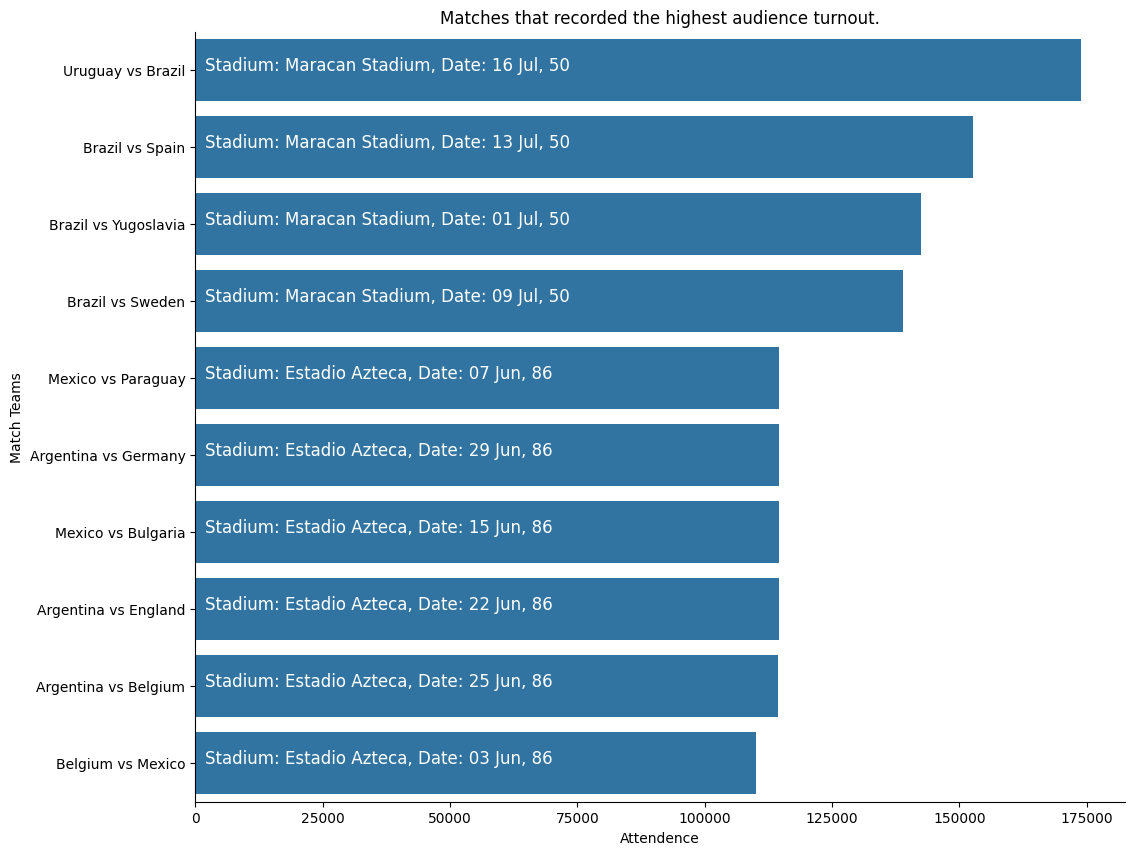

In [173]:
top10 = matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize = (12,10))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches that recorded the highest audience turnout.')

for i, s in enumerate("Stadium: " + top10['Stadium'] +", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()

## The stadium with the highest average crowd attendance.

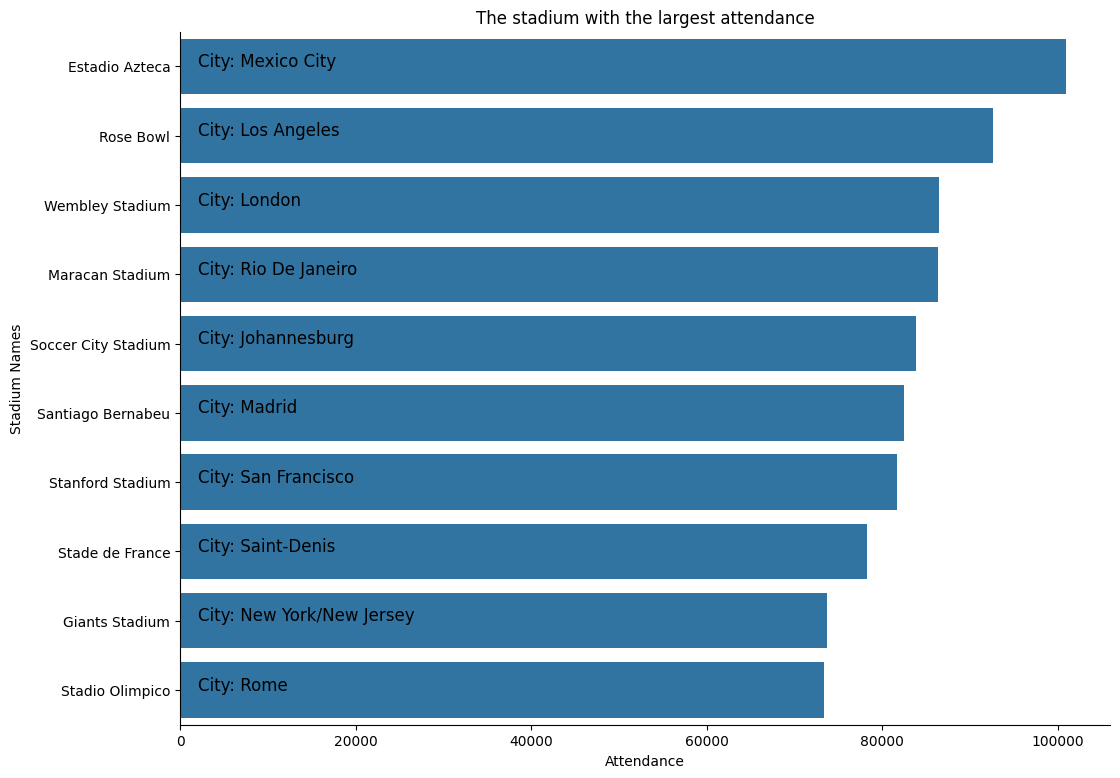

In [174]:
matches['Year'] = matches['Year'].astype(int)

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending =False)

top10 = std[:10]

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('The stadium with the largest attendance')
for i, s in enumerate("City: " + top10['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'k')

plt.show()

In [175]:
import cufflinks as cf
import pandas as pd
import plotly.offline as pyo

# Initialize Plotly offline mode                                        showing error
cf.go_offline()
pyo.init_notebook_mode(connected=True)

# Ensure no NaN values and column existence
if 'City' in matches.columns:
    matches['City'].dropna().value_counts()[:20].iplot(kind='bar', title='Top 20 Cities by Match Count')
else:
    print("Column 'City' not found in the dataset.")


Goals Scored by Each Team in Every World Cup.


In [176]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,"13 Jul, 30",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930,"13 Jul, 30",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [177]:
home = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home

Year  Home Team Name
1930  Argentina         16.0
      Brazil             4.0
      Chile              4.0
      France             4.0
      Paraguay           1.0
                        ... 
2014  Russia             1.0
      Spain              1.0
      Switzerland        4.0
      USA                2.0
      Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [178]:
away = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year  Away Team Name
1930  Argentina         2.0
      Belgium           0.0
      Bolivia           0.0
      Brazil            1.0
      Chile             1.0
                       ... 
2014  Russia            1.0
      Spain             3.0
      Switzerland       3.0
      USA               4.0
      Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [179]:
goals = pd.concat([home, away], axis=1)
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
Year                 
1930 Argentina   18.0
     Brazil       5.0
     Chile        5.0
     France       4.0
     Paraguay     1.0
...               ...
1998 Iran         2.0
     Mexico       8.0
     Norway       5.0
     Tunisia      1.0
2006 IR Iran      0.0

[427 rows x 1 columns]

In [180]:
goals = goals.reset_index()

In [181]:
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])
goals

,Year,Country,Goals
0,1930,Argentina,18.0
7,1930,Uruguay,15.0
6,1930,USA,7.0
8,1930,Yugoslavia,7.0
1,1930,Brazil,5.0
...,...,...,...
355,2014,Japan,2.0
361,2014,Russia,2.0
340,2014,Cameroon,1.0
352,2014,Honduras,1.0


In [182]:
top5 = goals.groupby('Year').head()
top5.head(10)

,Year,Country,Goals
0,1930,Argentina,18.0
7,1930,Uruguay,15.0
6,1930,USA,7.0
8,1930,Yugoslavia,7.0
1,1930,Brazil,5.0
13,1934,Italy,12.0
11,1934,Germany,11.0
10,1934,Czechoslovakia,9.0
9,1934,Austria,7.0
12,1934,Hungary,5.0


In [183]:
import plotly.graph_objects as go
import plotly.offline as pyo

# Initialize Plotly offline mode
pyo.init_notebook_mode(connected=True)

# Check the data for potential issues
print(top5.head())  # Display the first few rows
print(top5.isnull().sum())  # Check for missing values

# Filter out rows with missing data
top5 = top5.dropna(subset=['Country', 'Year', 'Goals'])

# Prepare the data for plotting
data = []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']

    # Ensure non-empty data
    if not year.empty and not goal.empty:
        data.append(go.Bar(x=year, y=goal, name=team))

# Create the layout for the plot
layout = go.Layout(barmode='stack', title='Top 5 Teams with Most Goals', showlegend=True)

# Create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()


   Year     Country  Goals
0  1930   Argentina   18.0
7  1930     Uruguay   15.0
6  1930         USA    7.0
8  1930  Yugoslavia    7.0
1  1930      Brazil    5.0
Year       0
Country    0
Goals      0
dtype: int64


Goals scored by each country.

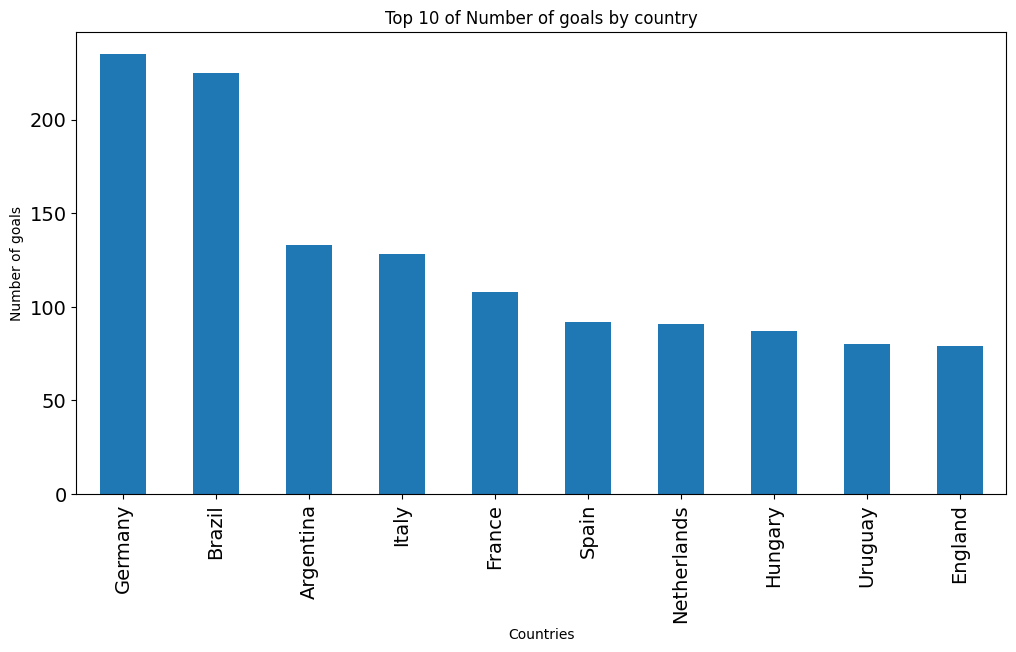

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'matches' is your original DataFrame

home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

# Create goal_per_country DataFrame
goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = pd.concat([
    home.rename(columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}),
    away.rename(columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'})
])

# Convert 'goals' to integer type
goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

# Group by country and sum the goals, then sort
goal_per_country = goal_per_country.groupby('countries')['goals'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the most goals
goal_per_country[:10].plot(kind="bar", figsize=(12, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')
plt.show()


Match outcomes categorized by home and away teams.

In [185]:

def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

In [186]:
matches['outcome'] = matches.apply(lambda x: get_labels(x), axis=1)

In [187]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcome
0,1930,"13 Jul, 30",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930,"13 Jul, 30",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930,"14 Jul, 30",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win
3,1930,"14 Jul, 30",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Win
4,1930,"15 Jul, 30",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Win


In [188]:
mt = matches['outcome'].value_counts()
mt

,count
outcome,
Home Team Win,488
DRAW,190
Away Team Win,174


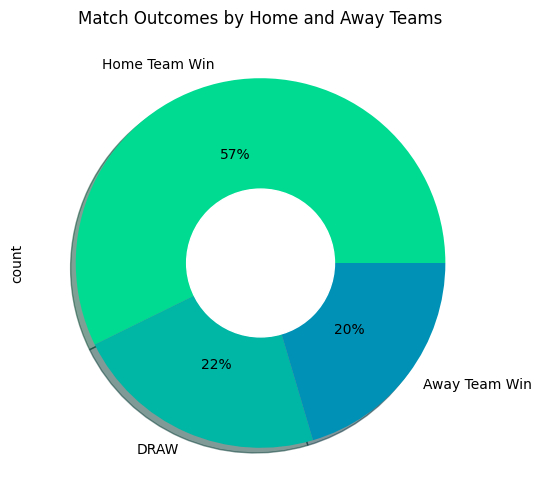

In [189]:
plt.figure(figsize = (6,6))

mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('winter_r'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()

The team with the most World Cup titles.

In [190]:
winner = world_cup['Winner'].value_counts()
winner

,count
Winner,
Brazil,5
Italy,4
Germany,4
Uruguay,2
Argentina,2
England,1
France,1
Spain,1


In [191]:
runnerup = world_cup['Runners-Up'].value_counts()
runnerup

,count
Runners-Up,
Germany,4
Argentina,3
Netherlands,3
Czechoslovakia,2
Hungary,2
Brazil,2
Italy,2
Sweden,1
France,1


In [192]:
third = world_cup['Third'].value_counts()
third

,count
Third,
Germany,4
Brazil,2
Sweden,2
France,2
Poland,2
USA,1
Austria,1
Chile,1
Portugal,1


In [193]:
teams = pd.concat([winner, runnerup, third], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,count,count,count
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [194]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [195]:
teams.iplot(kind = 'bar',
            xTitle='Teams',
            yTitle='Count',
            title='FIFA World Cup Winning Count')

Which countries were victorious in the cup?

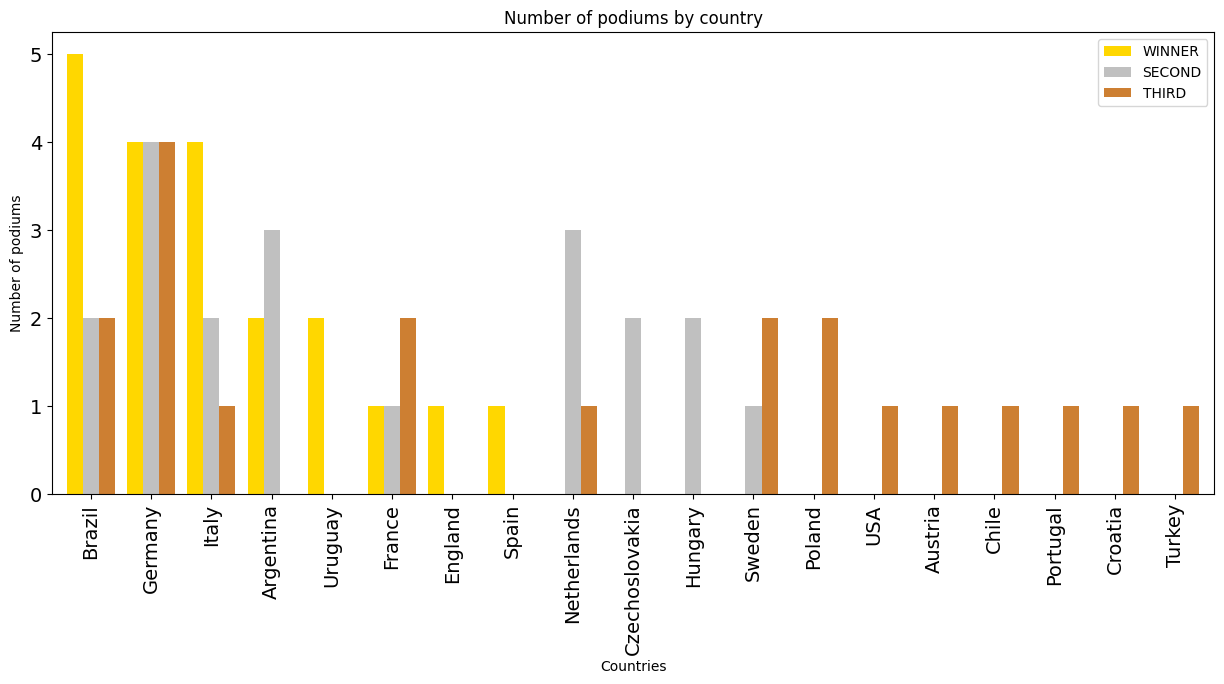

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'world_cup' DataFrame has 'Winner', 'Runners-Up', 'Third' columns
gold = world_cup["Winner"]
silver = world_cup["Runners-Up"]
bronze = world_cup["Third"]

# Create value counts for each category
gold_count = gold.value_counts()
silver_count = silver.value_counts()
bronze_count = bronze.value_counts()

# Combine the counts into a single DataFrame
podium_count = pd.concat([gold_count, silver_count, bronze_count], axis=1).fillna(0)
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']
podium_count = podium_count.astype('int64')

# Sort the values based on the number of wins, second, and third
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

# Plotting
podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar",
                  color=['#FFD700', '#C0C0C0', '#CD7F32'], figsize=(15, 6), fontsize=14,
                  width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podiums')
plt.title('Number of podiums by country')
plt.show()


thank you so much